<a href="https://colab.research.google.com/github/Mpho-code23/216664345/blob/master/email_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MAAKE M 216664345**

**# Assessment:**
• Email Spam Detection
**Objective:**
• Implement a binary ([0,1]) classification model using sklearn/scikit-learn to predict whether a given email is spam or not.

In [61]:
#LOAD LIBRARIES

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score



In [75]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Step 1: Load the data
data = pd.read_csv('/content/spam_ham_dataset.csv')

In [31]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [32]:
data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [33]:
#Dropping the last 3 columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
#Renaming the columns to be understandable
data.rename(columns={'label': 'Category', 'text': 'Email', 'label_num': 'Spam'}, inplace=True)
data.head()

,Category,Email,Spam
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [68]:
#finding null values
data.isnull().sum()

Category    0
Email       0
Spam        0
dtype: int64

In [69]:
data.shape

(5171, 3)

In [35]:
data.columns

Index(['Category', 'Email', 'Spam'], dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5171 non-null   object
 1   Email     5171 non-null   object
 2   Spam      5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [70]:
#Finding duplicates
data.duplicated().sum()

178

In [71]:
#dropping duplicates

data = data.drop_duplicates(keep = 'first')

In [72]:
#Finding duplicates
data.duplicated().sum()

0

In [37]:
#Mapping the target labels to 0 and 1
data['Category']=data['Category'].map({'ham': 0, 'spam': 1})
data.head()

,Category,Email,Spam
0,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,1,"Subject: photoshop , windows , office . cheap ...",1
4,0,Subject: re : indian springs\r\nthis deal is t...,0


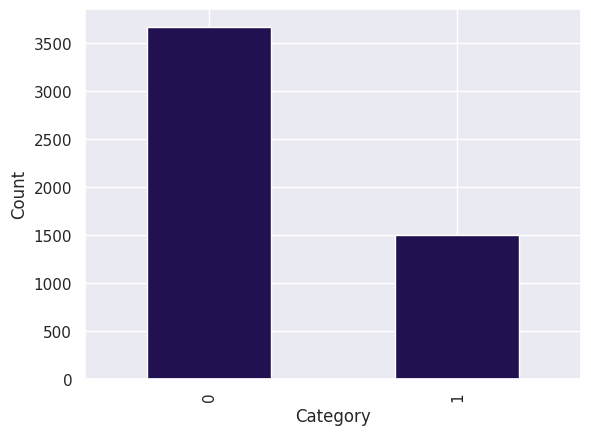

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
#Setting a color palette
palette=sns.color_palette('magma')
sns.set(palette=palette)

#Plotting Spam(1) vs Not Spam(0) value counts
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [41]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid= train_test_split(data['Email'], data['Category'], test_size=0.2, random_state=0)
X_train.head()

3628    Subject: meter 986296\r\nscherlyn , per our co...
2491    Subject: natural gas nomination for 08 / 00\r\...
3262    Subject: cleburne outage\r\ngentlemen ,\r\ni w...
2972    Subject: daren ,\r\nthe firm trading waha book...
2481    Subject: re : mon , 2 feb 2004 03 : 16 : 16 - ...
Name: Email, dtype: object

In [42]:
#Multinominal Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [44]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [46]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [47]:
#Predict Email
clf.predict(emails)

array([0, 1])

In [48]:

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [49]:

# Train the classifier (Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [76]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [77]:
# Evaluate the model- Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9719806763285024


In [78]:
import pickle


# Save the model to a file using pickle
with open('spam_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)
